# Pymaceuticals Inc.
---

### Analysis


We start off by combining two databases, one with mouse (test subjects) details and one with treatment(medicine) details for each mouse. A couple of interesting take aways we got from merging these two are:

Ramicane and Capomulin are the most effective drug in reducing the size of the tumors

For subject being administered the Capomulin treatment, there appears to be a dirrect relation between the weight of the mouse and the size of the tumor.

Our timeframe is only 45 days, but based off of the data we have collected so far, Ketapril and Naftisol seem to have the least promising results for treating cancerous tumors, while Ramicane and Capomulin showed the most promise so far. Further examination and a longer timeframe might help us come with much more confident conclusions.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_m_tp = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_m_tp['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_id = combined_data[combined_data['Mouse ID'] == 'g989']
dupe_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data[combined_data["Mouse ID"]!="g989"]
cleaned_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

group_regimen = cleaned_data_df.groupby('Drug Regimen')

# Calculate mean, median, variance, SD, and SEM of tumor vol for each regimen

mean_tumor_volume = group_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = group_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = group_regimen['Tumor Volume (mm3)'].var()
tumor_volume_std = group_regimen['Tumor Volume (mm3)'].std()
tumor_volume_sem = group_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summarystats = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                            'Median Tumor Volume': median_tumor_volume,
                            'Tumor Volume Variance': variance_tumor_volume,
                            'Tumor Volume Std. Dev.': tumor_volume_std,
                            'Tumor Volume SEM': tumor_volume_sem})

summarystats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarystats = cleaned_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

summarystats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

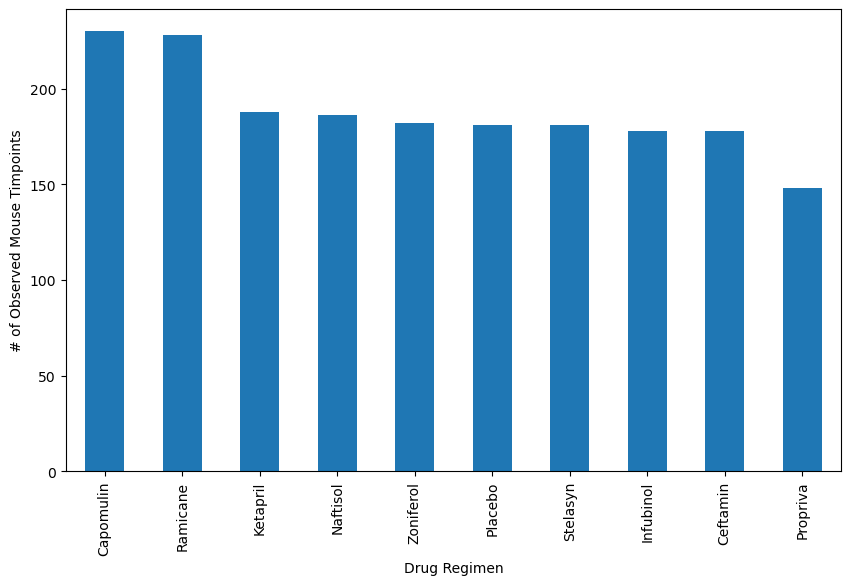

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group and count by Drug Regimen
drug_count = cleaned_data_df['Drug Regimen'].value_counts()

# Generate bar plot
drug_count.plot(kind='bar', figsize=(10, 6))
# Edit axis
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpoints')
plt.show()

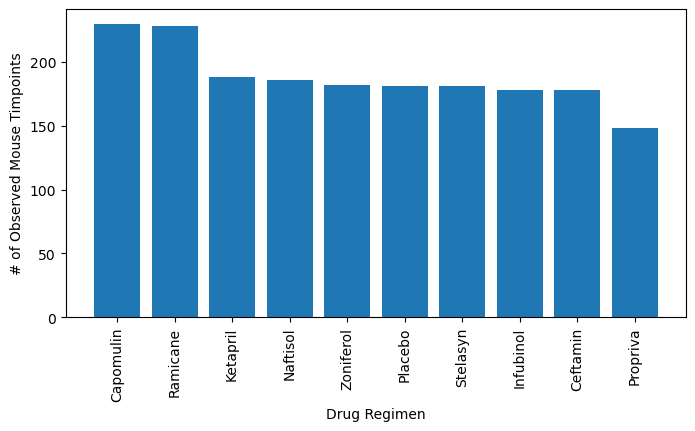

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group and count by Drug Regimen
drug_pycount = cleaned_data_df['Drug Regimen'].value_counts()

# Extract drug regimens and counts
regimens = drug_pycount.index
counts = drug_pycount.values

# # Generate bar plot with matplotlib
plt.figure(figsize=(8, 4))
plt.bar(regimens, counts)

# Edit graph
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpoints')
plt.xticks(rotation=90)

plt.show()

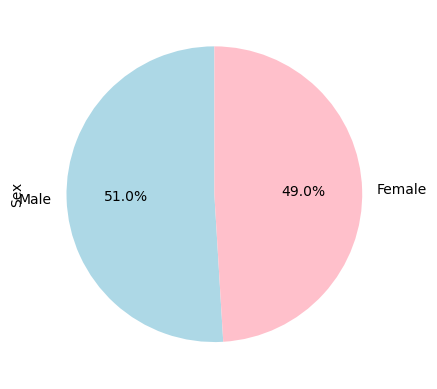

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = cleaned_data_df['Sex'].value_counts()
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

# Show plot
plt.show()


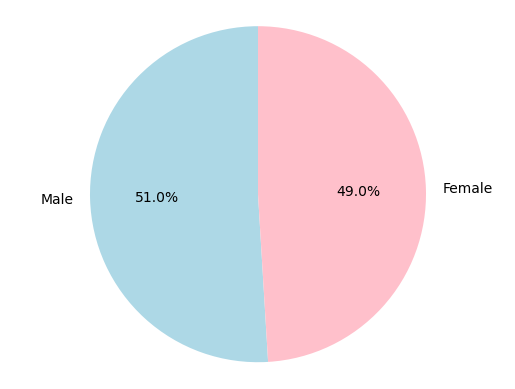

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = cleaned_data_df['Sex'].value_counts()

plt.pie(gender_count, labels = gender_count.index, autopct='%1.1f%%', startangle=90, colors= ['lightblue' , 'pink'])

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
dr_reg_data = cleaned_data_df[cleaned_data_df['Drug Regimen'].isin(regimens)]



# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = dr_reg_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint, dr_reg_data, on=['Mouse ID', 'Timepoint'], how='left')

tumor_volume



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    
    
    treatment_data = tumor_volume[tumor_volume['Drug Regimen'] == treatment]
 
    
   
    tumvol2 = treatment_data['Tumor Volume (mm3)']
    
   
    tumor_vol_data.append(tumvol2)
   
    
    
    quartiles = tumvol2.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    
    pot_outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]
    
    # Display the results
    print(f"Drug: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Number of potential outliers: {pot_outliers['Tumor Volume (mm3)'].tolist()}")
    print("\n")

Drug: Capomulin
IQR: 7.781863460000004
Number of potential outliers: []


Drug: Ramicane
IQR: 9.098536719999998
Number of potential outliers: []


Drug: Infubinol
IQR: 11.477135160000003
Number of potential outliers: [36.3213458]


Drug: Ceftamin
IQR: 15.577752179999997
Number of potential outliers: []




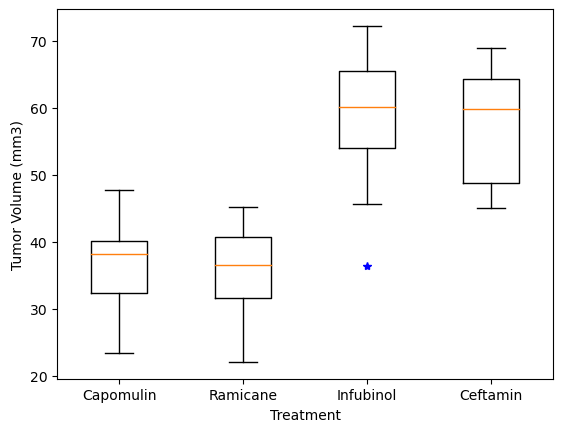

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure
plt.boxplot(tumor_vol_data, labels=treatments, sym='b*')

# Add labels
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

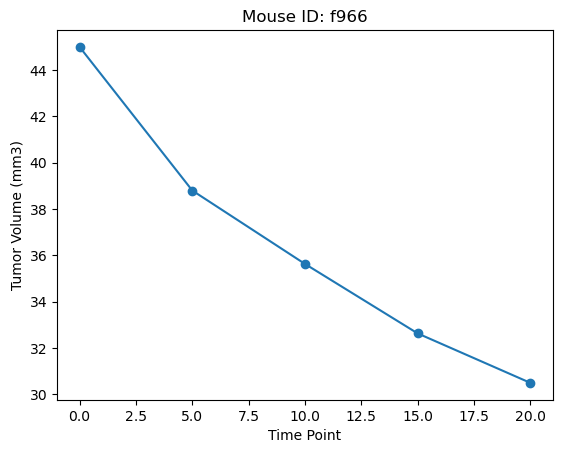

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select random target mouse
target_mouse = 'f966'
capomulin_data = cleaned_data_df[(cleaned_data_df['Drug Regimen'] == 'Capomulin') & (cleaned_data_df['Mouse ID'] == target_mouse)]

# Plot line
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o')
                                                                                     
plt.title(f"Mouse ID: {target_mouse}")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

plt.show()                                                                             

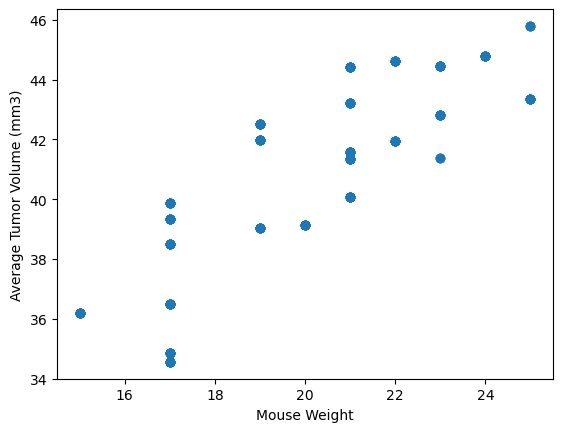

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin2 = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']

# Calculate tumor volume average
avg_tum_vol = capomulin2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge weight data and average tumor volume data
av_tumor_w_data = pd.merge(avg_tum_vol, capomulin2[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Plot scattter plot
plt.scatter(av_tumor_w_data['Weight (g)'], av_tumor_w_data['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [18]:
correlation = round(st.pearsonr(av_tumor_w_data['Weight (g)'],av_tumor_w_data['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between weight and average tumor volume is {correlation}")

The correlation between weight and average tumor volume is 0.83


In [19]:
linear_regression = st.linregress(av_tumor_w_data['Weight (g)'],av_tumor_w_data['Tumor Volume (mm3)'])
linear_regression

LinregressResult(slope=0.9609669432428362, intercept=21.48982721329954, rvalue=0.8343958614425957, pvalue=6.495737656135933e-61, stderr=0.04203886745939214, intercept_stderr=0.8471050624565543)

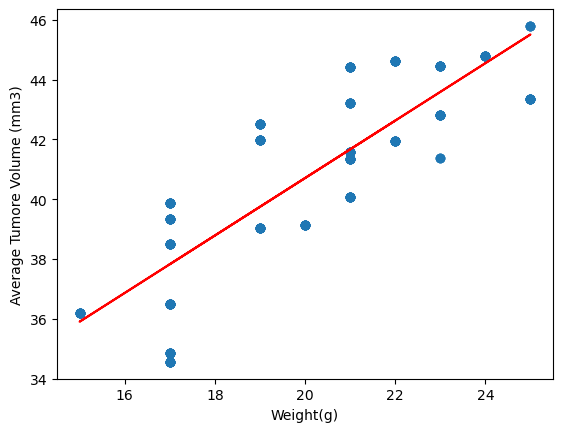

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Get the slope and intercept values from our linear_regression calculation above
slope = 0.9609669432428362
intercept = 21.48982721329954

#Plot the linear regression line
y_values = av_tumor_w_data['Weight (g)']*slope + intercept
plt.scatter(av_tumor_w_data['Weight (g)'],av_tumor_w_data['Tumor Volume (mm3)'])
plt.plot(av_tumor_w_data['Weight (g)'],y_values,color="r")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()
